![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

2022-05-14 08:42:12.275933: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-14 08:42:12.275952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
# Carga de datos de archivo .csv
path = "https://raw.githubusercontent.com/albahnsen\
/MIAD_ML_and_NLP/main/datasets\
/universityGraduateAdmissions.csv"

data = pd.read_csv(path, index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


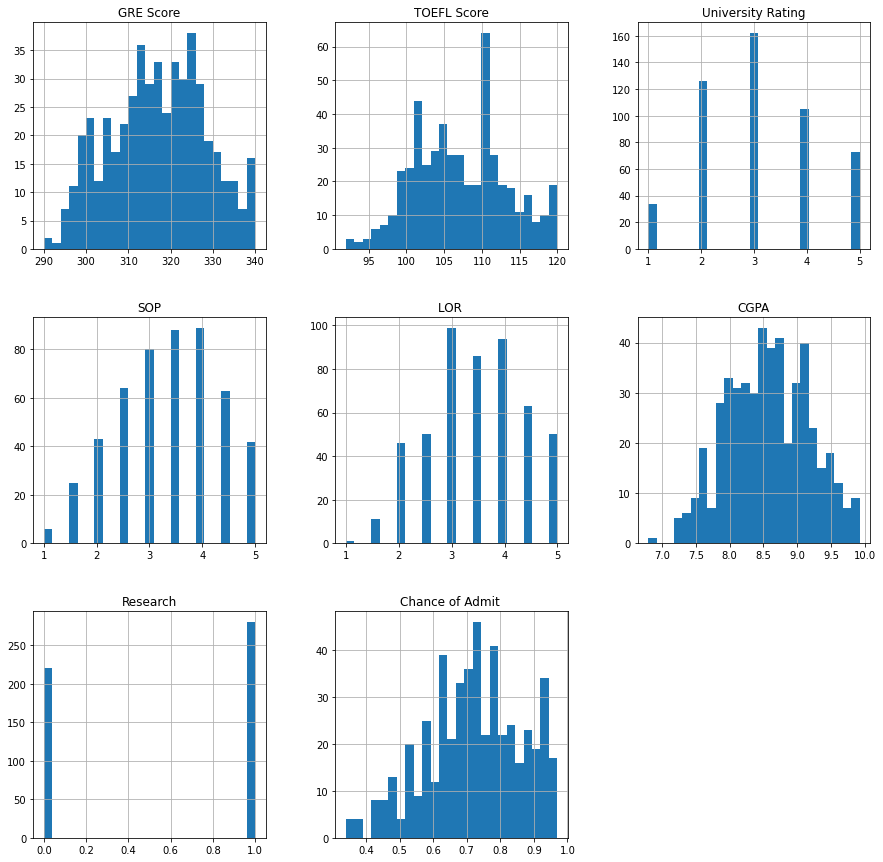

In [9]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [13]:
# Definición de variables predictoras (X)
x = data.drop(data.columns[-1], axis=1)

# Definición de variable de interés (y)
y = data[data.columns[-1]]

In [66]:
# Separación de variables predictoras (X) y variable de interés (y) en set 
# de entrenamiento y test usandola función train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
                                                    x,
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=22
                                                    )

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

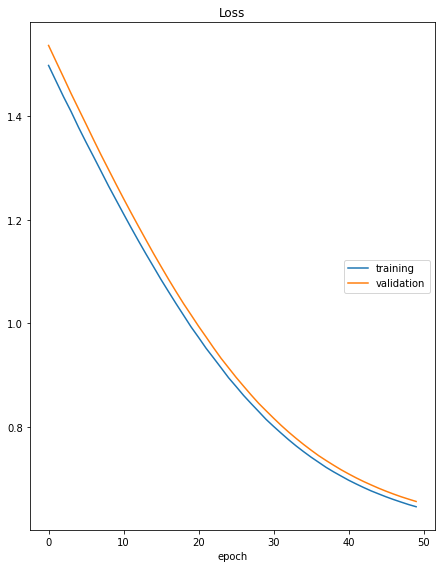

Loss
	training         	 (min:    0.646, max:    1.498, cur:    0.646)
	validation       	 (min:    0.656, max:    1.537, cur:    0.656)
11/11 [==============================] - 0s 15ms/step - loss: 0.6458 - val_loss: 0.6560


In [70]:
# Celda 1
from sklearn.preprocessing import StandardScaler
from keras.layers import Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts




# Scaling datasets
scaler = StandardScaler()
def scale(df):
    df = pd.DataFrame(
        data=scaler.fit_transform(df), 
        columns=df.columns, 
        index=df.index
    )
    return np.array(df)


# Get scaled arrays
x_train = scale(X_train)
x_test = scale(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)


# Get output dims
output_var = 1
dims = x_train.shape[1]


# Creating the model
K.clear_session()

one_layer = Sequential()
one_layer.add(Dense(output_var, input_shape=(dims,)))
one_layer.add(Activation('sigmoid'))
one_layer.compile(optimizer="adam", loss="binary_crossentropy")

# Train and evaluate model
one_layer.fit(x_train, y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()])

Parámetros seleccionados:
- **Función de activación** - **Sigmoid**: Esta función transforma los outputs en valores que van de 0 a 1 y es especialmente útil en problemas de clasificación. 
- **Optimizador** - **Adam**: El optimizador Adam (Adaptive Moment Estimation) es confiable y de rápida convergencia. Generalmente tiene buen desempeño minimizando la función de costo.
- **Función de pérdida** - **Binary Cross-entropy**: Esta función de pérdida mide el desempeño de modelos que tienen como outputs valores de probabilidades entre 0 y 1.

No se consideró añadir EarlyStopping ni Dropouts para este modelo ya que se busca evaluar el desempeño en su forma más básica.

In [89]:
from sklearn.metrics import mean_squared_error

one_layer_mse = mean_squared_error(y_test, one_layer.predict(x_test))
one_layer_mse = round(one_layer_mse, 4)
one_layer_mse

0.0469

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

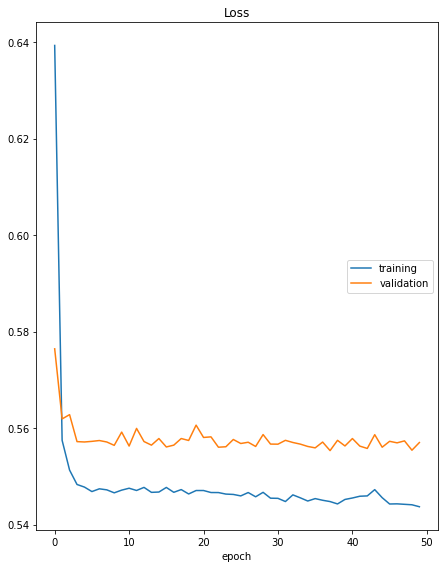

Loss
	training         	 (min:    0.544, max:    0.639, cur:    0.544)
	validation       	 (min:    0.555, max:    0.576, cur:    0.557)
11/11 [==============================] - 0s 17ms/step - loss: 0.5437 - val_loss: 0.5570


In [92]:
# Celda 2
# Scaling datasets
scaler = StandardScaler()
def scale(df):
    df = pd.DataFrame(
        data=scaler.fit_transform(df), 
        columns=df.columns, 
        index=df.index
    )
    return np.array(df)


# Get scaled arrays
x_train = scale(X_train)
x_test = scale(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)


# Get output dims
output_var = 1
dims = x_train.shape[1]


# Creating the model
K.clear_session()

multi_layer = Sequential()
multi_layer.add(Dense(256, input_shape=(dims,)))
multi_layer.add(Dense(256, activation='tanh'))
multi_layer.add(Dense(256, activation='tanh'))
multi_layer.add(Dense(output_var))
multi_layer.add(Activation('sigmoid'))
multi_layer.compile(optimizer="adam", loss="binary_crossentropy")

# Train and evaluate model
multi_layer.fit(x_train, y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()])

Parámetros seleccionados:
- **Función de activación** - **Sigmoid**: Esta función transforma los outputs en valores que van de 0 a 1 y es especialmente útil en problemas de clasificación. 
- **Optimizador** - **Adam**: El optimizador Adam (Adaptive Moment Estimation) es confiable y de rápida convergencia. Generalmente tiene buen desempeño minimizando la función de costo.
- **Función de pérdida** - **Binary Cross-entropy**: Esta función de pérdida mide el desempeño de modelos que tienen como outputs valores de probabilidades entre 0 y 1.

Se añadieron 3 capas ocultas con 256 neuronas cada una para aumentar la complejidad e intentar mejorar el desempeño del modelo.

In [93]:
multi_layer_mse = mean_squared_error(y_test, multi_layer.predict(x_test))
multi_layer_mse = round(multi_layer_mse, 4)
multi_layer_mse

0.0041

El desempeño del modelo mejoró considerablemente. Añadir capas ocultas aumentó el poder predictivo del modelo.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

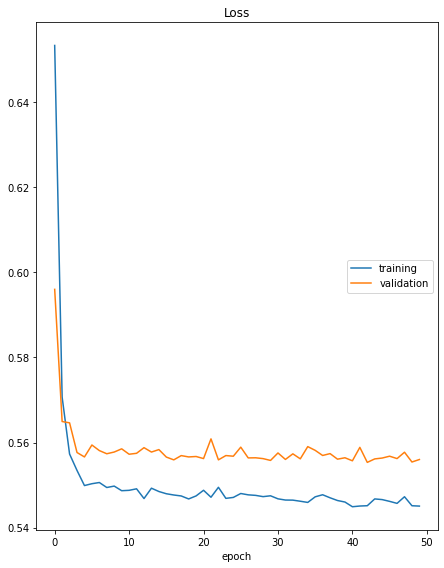

Loss
	training         	 (min:    0.545, max:    0.653, cur:    0.545)
	validation       	 (min:    0.555, max:    0.596, cur:    0.556)
11/11 [==============================] - 0s 18ms/step - loss: 0.5451 - val_loss: 0.5560


In [87]:
# Celda 3
# Import libraries
from keras.callbacks import EarlyStopping
from keras.layers import Dropout


# Scaling datasets
scaler = StandardScaler()
def scale(df):
    df = pd.DataFrame(
        data=scaler.fit_transform(df), 
        columns=df.columns, 
        index=df.index
    )
    return np.array(df)


# Get scaled arrays
x_train = scale(X_train)
x_test = scale(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)


# Get output dims
output_var = 1
dims = x_train.shape[1]


# Creating the model
K.clear_session()

multi_layer = Sequential()
multi_layer.add(Dense(256, input_shape=(dims,)))
multi_layer.add(Dropout(0.2))
multi_layer.add(Dense(256, activation='tanh'))
multi_layer.add(Dropout(0.2))
multi_layer.add(Dense(256, activation='tanh'))
multi_layer.add(Dense(output_var))
multi_layer.add(Activation('sigmoid'))
multi_layer.compile(optimizer="adam", loss="binary_crossentropy")


# Overfitting strategies
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1) 

# Train and evaluate model
multi_layer.fit(x_train, y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()])

Parámetros seleccionados:
- **Función de activación** - **Sigmoid**: Esta función transforma los outputs en valores que van de 0 a 1 y es especialmente útil en problemas de clasificación. 
- **Optimizador** - **Adam**: El optimizador Adam (Adaptive Moment Estimation) es confiable y de rápida convergencia. Generalmente tiene buen desempeño minimizando la función de costo.
- **Función de pérdida** - **Binary Cross-entropy**: Esta función de pérdida mide el desempeño de modelos que tienen como outputs valores de probabilidades entre 0 y 1.

Al modelo anterior se le incluyó el parámetro EarlyStopping para que el entrenamiento se detenga si el validation loss no mejora luego de tres epochs. También se le añadieron random dropouts para que el 20% de las neuronas se desactiven en cada capa oculta de manera aleatoria y de esta manera se previene el overfitting.

In [91]:
multi_better_mse = mean_squared_error(y_test, multi_layer.predict(x_test))
multi_better_mse = round(multi_better_mse, 4)
multi_better_mse

0.0037

Se evidencia que aplicar estos parámetros mejora las predicciones en el set de prueba con respecto al modelo anterior.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

### Resultados

La siguiente tabla presenta los resultados y características de los modelos construidos:

| Model              | Hidden layers | EarlyStop | Dropout | MSE    |
|--------------------|---------------|-----------|---------|--------|
| one_layer          | 0             | N         | N       | 0.0469 |
| multi_layer        | 3             | N         | N       | 0.0041 |
| multi_layer_better | 3             | Y         | Y       | 0.0037 |


- El primer modelo es el más simple. Presenta una sola capa, utiliza el optimizador Adam y emplea binary-cross entropy como función de pérdida. Este modelo registró un MSE de 0.0469 al ser evaluado con los datos de prueba. Considerando que se está evaluando la probabilidad de ser adimito en una universidad, este es un buen resultado.

- El segundo modelo incluye capas ocultas. Este modelo utilizó el mismo optimizador y la misma función de pérdida que el anterior (Adam y binary-cross entropy respectivamente), si embargo se le añadieron 3 capas ocultas con 256 neuronas cada una. Esto redujo el MSE a 0.0041; una mejora muy significativa.

- Por último, se construyó un modelo con Early stopping y random Dropouts. Este modelo utilizó el mismo optimizador y la misma función de pérdida que el anterior (Adam y binary-cross entropy respectivamente). Los resultados de este modelo indican que se manejó de mejor manera el overfitting, logrando disminuir aún más el MSE hasta 0.0037.

Se concluye que el mejor modelo es el que emplea 3 capas ocultas y métodos para evitar el overfitting como Early Stopping y Dropouts.